In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [10]:
(x1_train,y1_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
def split_data(x1_train,y1_train,train_size=0.9,shuffle=True):
    size = len(x1_train)
    indices = np.arange(size)
    if shuffle==True:
        np.random.shuffle(indices)
        
    train_samples = int(train_size*size)

    x_train = x1_train[indices[:train_samples]]
    y_train = y1_train[indices[:train_samples]]
    x_val = x1_train[indices[train_samples:]]
    y_val = y1_train[indices[train_samples:]]
    return x_train,x_val,y_train,y_val

x_train,x_valid,y_train,y_valid = split_data(np.array(x1_train),np.array(y1_train))
print('Number of Training Samples: ',len(x_train))
print('Number of Valid samples: ',len(x_valid))
print('Number of Test samples: ',len(x_test))

Number of Training Samples:  54000
Number of Valid samples:  6000
Number of Test samples:  10000
<class 'numpy.ndarray'>


In [3]:
print(x_train[0].shape)

(28, 28)


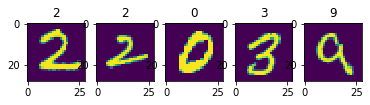

In [4]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [11]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
x_valid = x_valid.reshape(x_valid.shape[0],-1)

In [12]:
def build_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1]),name='input')
    x = tf.keras.layers.Dense(128,activation='relu',name='hidden1')(inputs)
    x = tf.keras.layers.Dense(256,activation='relu',name='hidden2')(x)
    outputs = tf.keras.layers.Dense(10,activation='softmax',name='output')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

model = build_model()
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               100480    
_________________________________________________________________
hidden2 (Dense)              (None, 256)               33024     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 10
batch_size = 60
validation_dataset = (x_valid,y_valid)
model.fit(x_train,y_train,batch_size=batch_size,
          validation_data = validation_dataset,
          epochs=num_epochs)

Epoch 1/10
900/900 [==============================] - 2s 2ms/step - loss: 1.6536 - accuracy: 0.8685 - val_loss: 0.4453 - val_accuracy: 0.9205
Epoch 2/10
900/900 [==============================] - 2s 2ms/step - loss: 0.4103 - accuracy: 0.9255 - val_loss: 0.3695 - val_accuracy: 0.9270
Epoch 3/10
900/900 [==============================] - 2s 2ms/step - loss: 0.2874 - accuracy: 0.9381 - val_loss: 0.3432 - val_accuracy: 0.9260
Epoch 4/10
900/900 [==============================] - 2s 2ms/step - loss: 0.2455 - accuracy: 0.9452 - val_loss: 0.2538 - val_accuracy: 0.9472
Epoch 5/10
900/900 [==============================] - 2s 2ms/step - loss: 0.1877 - accuracy: 0.9562 - val_loss: 0.2169 - val_accuracy: 0.9493
Epoch 6/10
900/900 [==============================] - 1s 2ms/step - loss: 0.1488 - accuracy: 0.9611 - val_loss: 0.1622 - val_accuracy: 0.9597
Epoch 7/10
900/900 [==============================] - 1s 2ms/step - loss: 0.1226 - accuracy: 0.9669 - val_loss: 0.1787 - val_accuracy: 0.9610
Epoch 

In [20]:
y_pred = model.predict(x_test).argmax(axis=1)
y_pred = np.array(y_pred)
correct = 0
for i in range(len(y_test)):
    if(y_pred[i]==y_test[i]):
        correct += 1
        
test_acc = 100.0*(correct/len(y_test))
print(test_acc)

96.16
